# Logistic Regression 
Logistic Regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms it's output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes. 

Logistic Regression can be used for:
1) Binary Classfication
2) Multi-Class Classification
3) One-vs-Rest Classification

# Assumptions of Logistic Regression
1) The dependent Variable must categorical in nature
2) The feature must be independent
3) There should be no outliers in the data. (Remove if any)

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [21]:
#load the dataset
data = pd.DataFrame(sns.load_dataset('titanic'))
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
data.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [23]:
#Preprocess the data

data.drop('deck', axis=1, inplace=True)

#impute missing values
data['age'].fillna(data['age'].median(), inplace=True)
data['embarked'].fillna(data['embarked'].mode(), inplace=True)
data['embark_town'].fillna(data['embark_town'].mode(), inplace=True)

#Encode all the categorical data in the data
encoder  = LabelEncoder()
for column in data.columns:
    if(data[column].dtype == "object" or data[column].dtype == "category"):
        data[column] = encoder.fit_transform(data[column])


C:\Users\Wahaj Sajid\AppData\Local\Temp\ipykernel_17360\1012365535.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
C:\Users\Wahaj Sajid\AppData\Local\Temp\ipykernel_17360\1012365535.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [24]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [25]:
# Spliting the X and Y where X (feature) is the independent variable and Y (Target) is the dependent variable
feature = data.drop('survived', axis=1)
target = data['survived']

In [26]:
# train, test split the model
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.8)

In [27]:
model = LogisticRegression()
model.fit(feature_train, target_train)

c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
#predict the model 
predict = model.predict(feature_test)

In [ ]:
#Evaluate the model
print("Accuracy: ", accuracy_score(target_test, predict))
print("Recall: ", recall_score(target_test, predict))
print("Precision: ", precision_score(target_test, predict))
print("F1 Score: ", f1_score(target_test, predict))
print("Confusion Matrix: ", confusion_matrix(target_test, predict))
print("classification report: ", classification_report(target_test, predict))

Accuracy:  1.0
Recall:  1.0
Precision:  1.0
F1 Score:  1.0
Confusion Matrix:  [[438   0]
 [  0 275]]


Text(95.72222222222221, 0.5, 'Actual')

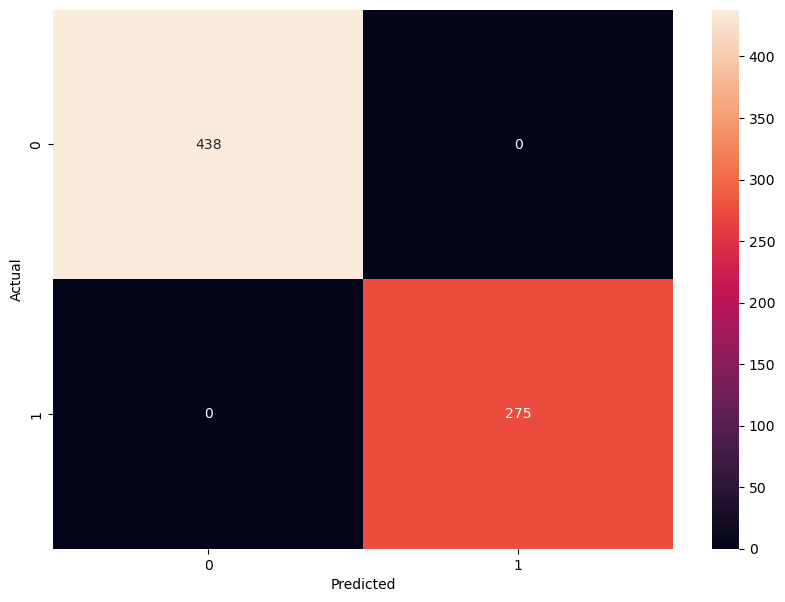

In [32]:
#plot the confusion matrix 
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(target_test, predict), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [33]:
#save the model
import pickle
pickle.dump(model, open('./Models/logistic_regression_model.pkl', 'wb'))